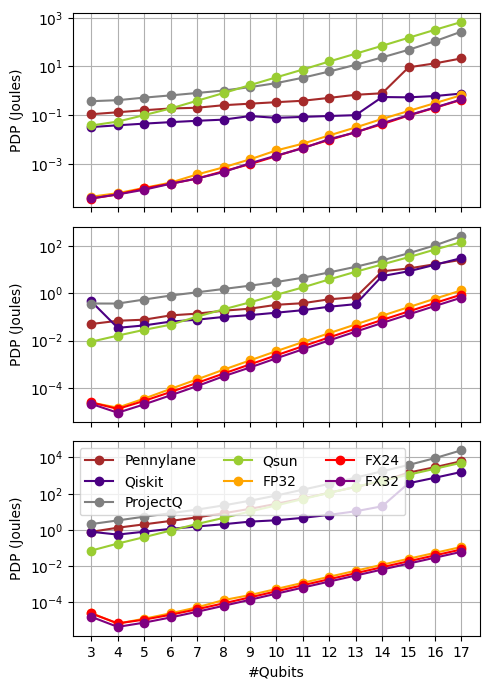

In [26]:
import os
from collections import defaultdict
import numpy as np
# Define the directories and platforms
cpu_platforms = ["Pennylane", "Qiskit", "ProjectQ", "Qsun"]
hardware_platforms = ["FP32", "FX24", "FX32"]
qubits = range(3, 18) 
colors = {
    'FP16': 'blue',
    'FP32': 'orange',
    'FX16': 'green',
    'FX24': 'red',
    'FX32': 'purple',
    'Qiskit': 'indigo',
    'Pennylane': 'brown',
    'ProjectQ': 'gray',
    'Qsun': 'yellowgreen'
    
}


import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(5, 7))



for j, app in enumerate(["qrc", "qft", "psr"]):
    
    # Handle qft and psr apps
    for platform in cpu_platforms:
        if app in ["qft", "psr"]:
            time_file = f"../time/{app}/{app}_{platform}_cad114_Time.txt"
            
        else:
            time_file = f"../time/qrc/QRC_{platform}_cad114_depth10_Time.txt"
        power_file = f"../power/{app}/{app}_{platform}_cad114_power.txt"
        times = np.loadtxt(time_file)
        powers = np.loadtxt(power_file)
        pdps = []
        for i, qubit in enumerate(qubits):
            pdp = powers[i] * times[i]
            pdps.append(pdp)
        axs[j].plot(qubits, pdps, '-o', label=platform, color=colors[platform])
        
        
        
    for platform in hardware_platforms:
        if app in ["qft", "psr"]:
            time_file = f"../time/{app}/{app.upper()}_{platform}_Time.txt"
            powers = {
                "FP32": 0.3,
                "FX24": 0.36,
                "FX32": 0.23
            }
        else:
            time_file = f"../time/FPGA_QRC/{platform}/time/{platform}_10_Time.txt"
            powers = {
                "FP32": 0.91,
                "FX24": 0.91,
                "FX32": 0.81
            }
        pdps = []
        times = np.loadtxt(time_file)
        
        for i, qubit in enumerate(qubits):
            pdp = powers[platform] * times[i]
            pdps.append(pdp)
        axs[j].plot(qubits, pdps, '-o', label=platform, color=colors[platform])
        
        
        

for j in range(3):
    axs[j].set_yscale('log')  
    axs[j].grid()
    axs[j].set_xticks(qubits)
    axs[j].set_xticklabels([])
    axs[j].set_ylabel('PDP (Joules)')

axs[2].set_xticklabels(qubits)
axs[2].set_xlabel('#Qubits')

axs[2].legend(loc='upper left', ncols = 3)
plt.tight_layout()
plt.savefig("../images/pdp_all.svg")